In [1]:
%pip install pandas numpy seaborn torch matplotlib scipy openpyxl

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached nvidia_

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import scipy

In [3]:
df = pd.read_excel('Book2.xlsx')

In [4]:
df.shape

(60, 24)

In [5]:
df.head()

,0.00,0.50,1.00,1.50,2.00,3.00,3.33,3.66,4.00,4.33,...,6.00,7.00,8.00,10.00,12.00,16.00,24.00,48.00,72.00,96.00
0,0,407.0,1000.0,1200.0,1360.0,1750,1540,1660,1540,1950,...,1080,1050,1060,872,945,893,579,181.0,51.6,13.8
1,0,121.0,225.0,708.0,1440.0,2510,1750,1760,1850,1770,...,1240,1250,1220,1320,1140,1030,741,323.0,89.8,32.9
2,0,157.0,453.0,731.0,841.0,911,972,951,968,926,...,717,673,654,514,524,477,260,75.5,21.9,0.0
3,0,297.0,508.0,1030.0,1140.0,1480,1480,1410,1360,1200,...,893,847,900,825,677,525,472,245.0,101.0,44.2
4,0,136.0,195.0,640.0,1260.0,1530,1440,1500,1620,1600,...,1110,946,998,1060,860,881,756,526.0,271.0,147.0


In [6]:
x = np.array([float(elem) for elem in df.columns])
y = df.iloc[0,]
for interp in [scipy.interpolate.CubicSpline, scipy.interpolate.PchipInterpolator,
               scipy.interpolate.make_interp_spline, scipy.interpolate.interp1d]:
    func = interp(x, y)
    x_cont = np.linspace(0, np.max(x), 2000)
    # plt.title(f"{interp.__name__}")
    # plt.plot(x, y)
    # plt.plot(x_cont, func(x_cont))
    # plt.show()

In [7]:
interpolator = scipy.interpolate.PchipInterpolator

In [8]:
squares = []
integrator = scipy.integrate.quad_vec
for i in range(len(df)):
    x = [float(elem) for elem in df.select_dtypes(include=['float64', 'int64'])]
    y = df.iloc[i,]
    func = interpolator(x, y)
    x_cont = np.linspace(0, np.max(x), 2000)
    area, eps = integrator(func, 0, np.max(x))
    squares.append(area)
    # plt.plot(x, y)
    # plt.plot(x_cont, func(x_cont))
    # plt.show()
df['area'] = squares

In [9]:
squares = np.array(df['area'])
squares_log = np.log(squares)
scipy.stats.normaltest(squares_log)

NormaltestResult(statistic=11.975523670769851, pvalue=0.0025092739380717217)

In [10]:
M = []
for i in range(len(df)):
    x = [float(elem) for elem in df.drop('area', axis=1).columns]
    y = df.iloc[i,][:-1]
    M.append(x[np.argmax(y)])
df['max'] = M

In [11]:
df.head()

,0.0,0.5,1.0,1.5,2.0,3.0,3.33,3.66,4.0,4.33,...,8.0,10.0,12.0,16.0,24.0,48.0,72.0,96.0,area,max
0,0,407.0,1000.0,1200.0,1360.0,1750,1540,1660,1540,1950,...,1060,872,945,893,579,181.0,51.6,13.8,34718.981779,4.33
1,0,121.0,225.0,708.0,1440.0,2510,1750,1760,1850,1770,...,1220,1320,1140,1030,741,323.0,89.8,32.9,44729.250781,3.00
2,0,157.0,453.0,731.0,841.0,911,972,951,968,926,...,654,514,524,477,260,75.5,21.9,0.0,17650.298373,3.33
3,0,297.0,508.0,1030.0,1140.0,1480,1480,1410,1360,1200,...,900,825,677,525,472,245.0,101.0,44.2,31617.840859,3.00
4,0,136.0,195.0,640.0,1260.0,1530,1440,1500,1620,1600,...,998,1060,860,881,756,526.0,271.0,147.0,51889.269393,4.00


<Axes: >

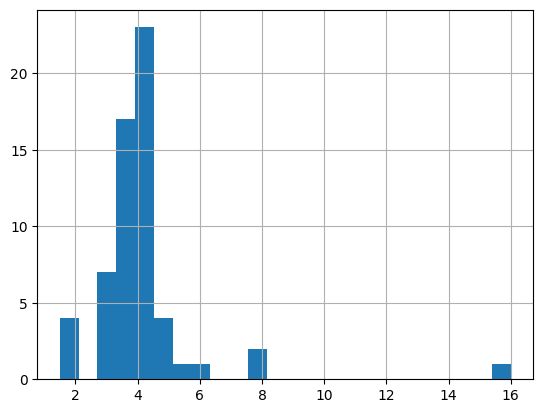

In [12]:
df['max'].hist(bins=len(df.columns) - 2)

In [13]:
m = df['max'].mean()

In [14]:
def check_fit(x, y, f1, f2, alpha, make_plots=True):
    m = x[np.argmax(y)]
    x1 = x[np.where(x <= m)]
    x2 = x[np.where(x >= m)]
    y1 = y[np.where(x <= m)]
    y2 = y[np.where(x >= m)]
    popt1, _ = scipy.optimize.curve_fit(f1, x1, y1)
    popt2, _ = scipy.optimize.curve_fit(f2, x2, y2)
    y_pred = np.array(list(f1(x1, *popt1))[:-1] + list(f2(x2, *popt2)))
    _, pvalue = scipy.stats.normaltest(y - y_pred)
    if make_plots:
        plt.plot(x, y)
        plt.plot(x, y_pred, color='red' if pvalue < alpha else 'green')
    plt.show()
    return pvalue, popt1, popt2

In [15]:
def f1(x, a, b, c):
    return a * x ** 2 + b * x + c

In [16]:
def f2(x, a, b, c, d):
    return np.exp(a * x + b) * (x ** 2 + x * d + c)

In [17]:
alpha = 0.05

In [18]:
pvalues = []
a1 = []
b1 = []
c1 = []
a2 = []
b2 = []
c2 = []
d2 = []

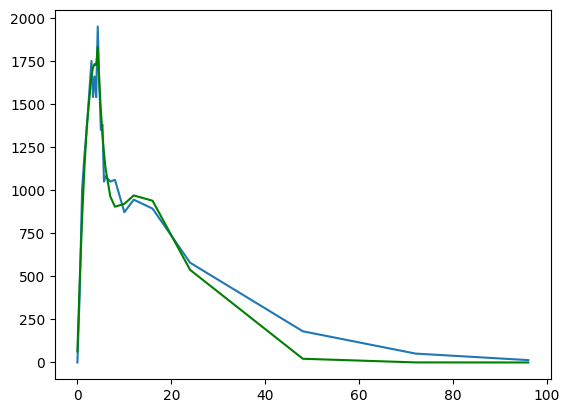

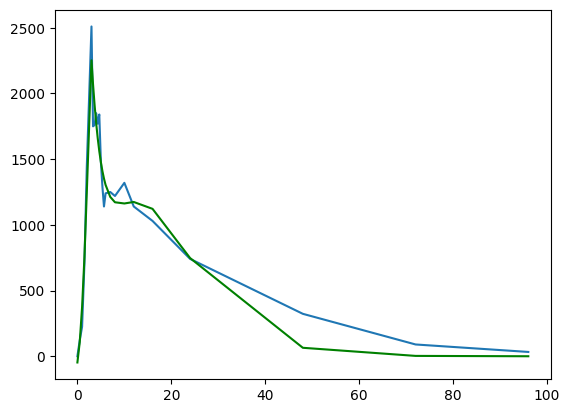

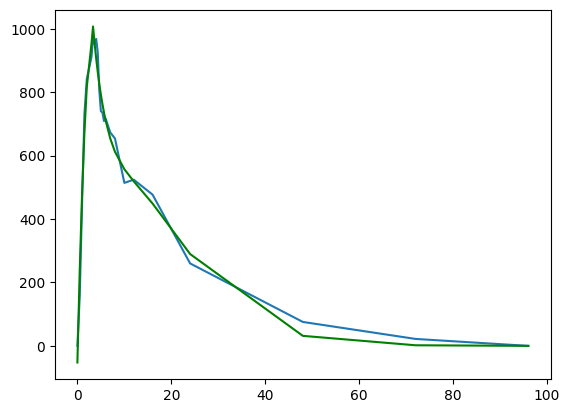

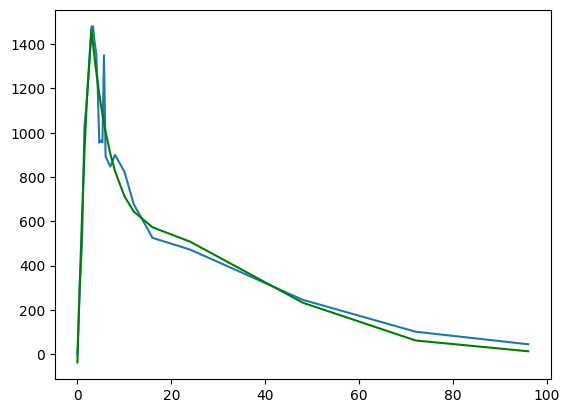

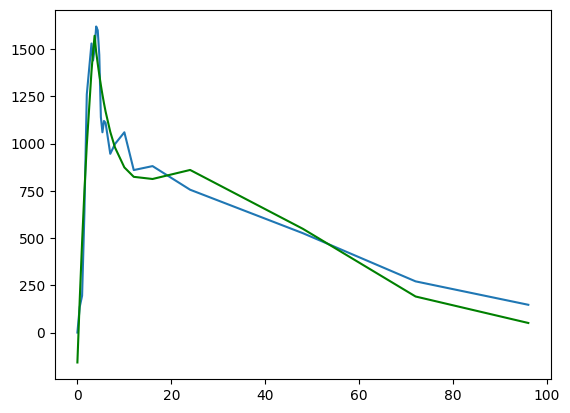

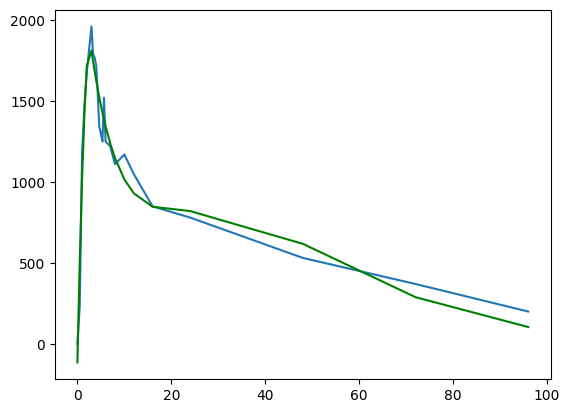

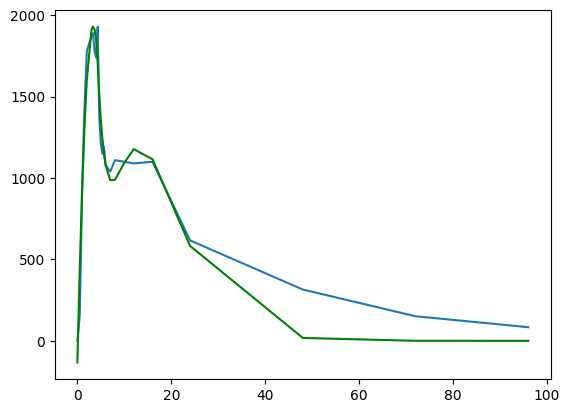

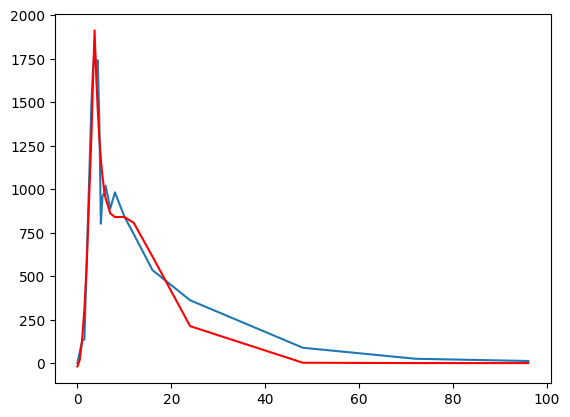

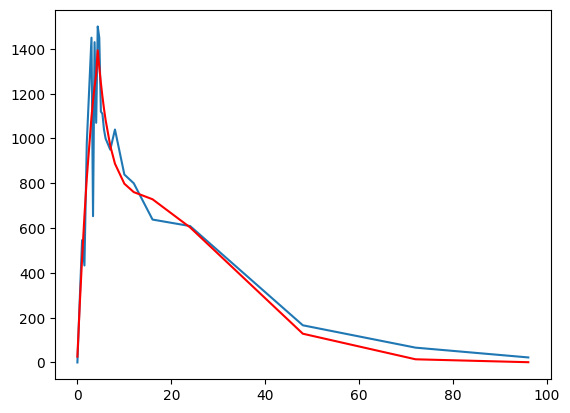

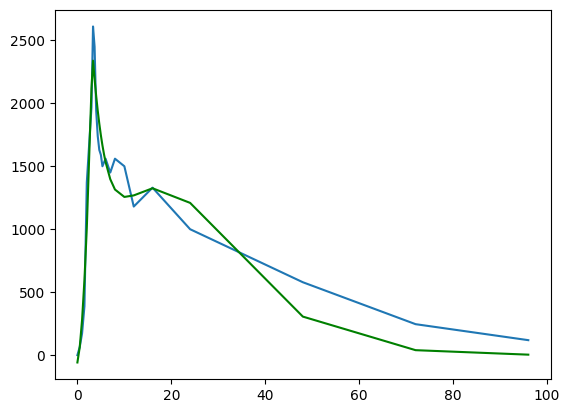

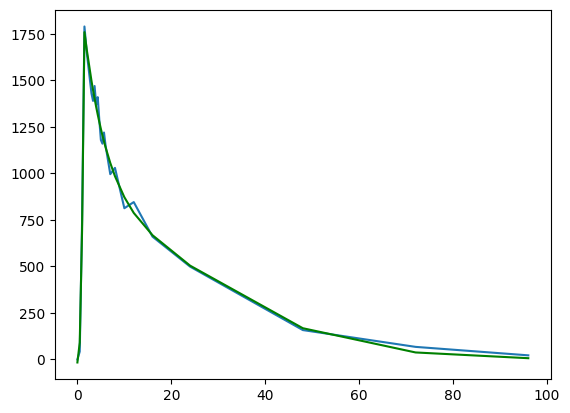

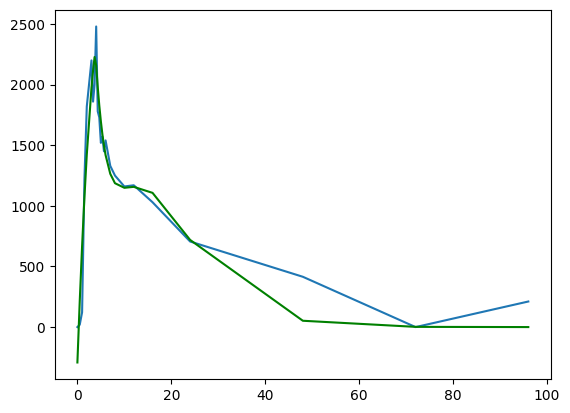

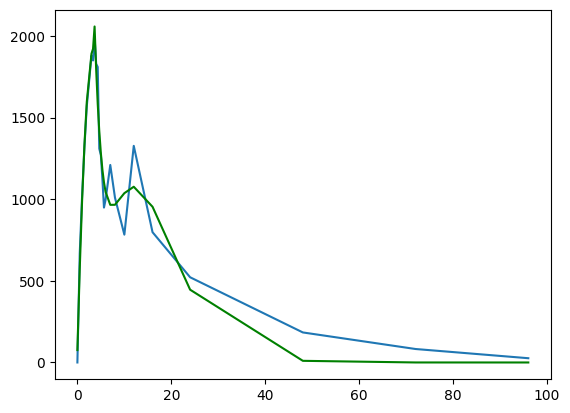

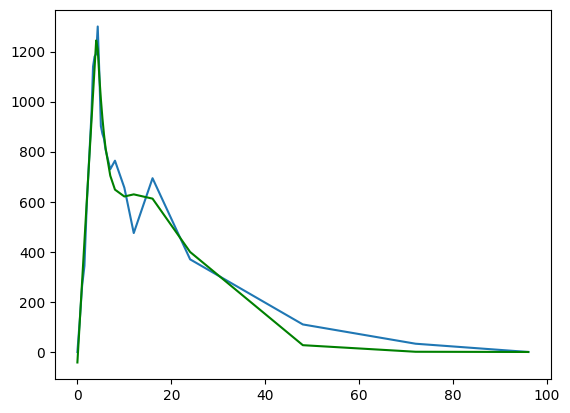

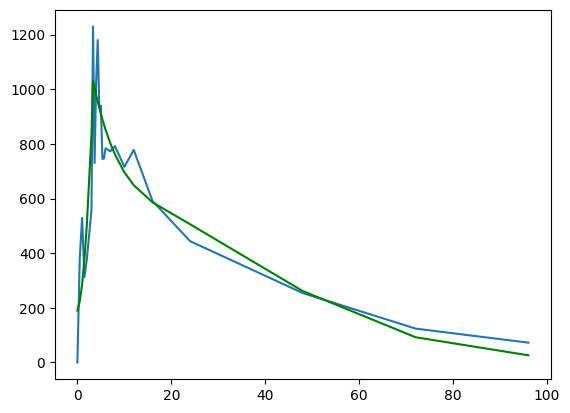

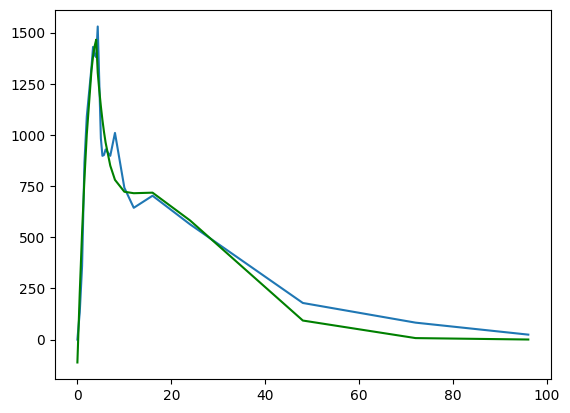

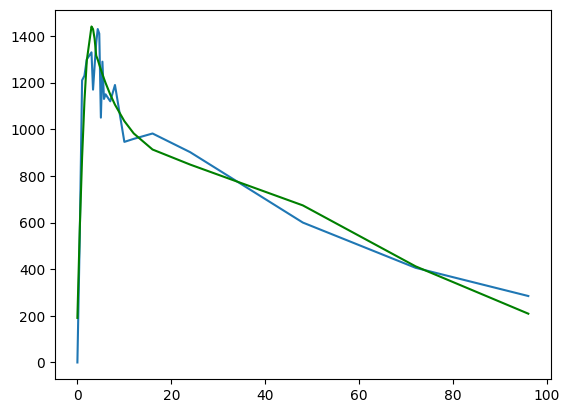

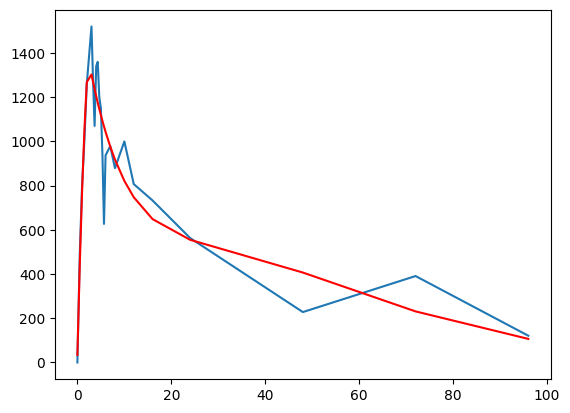

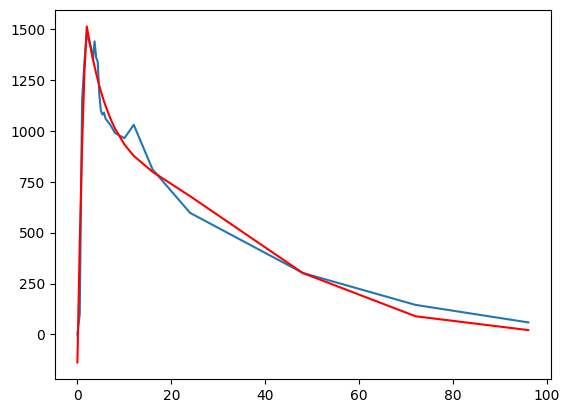

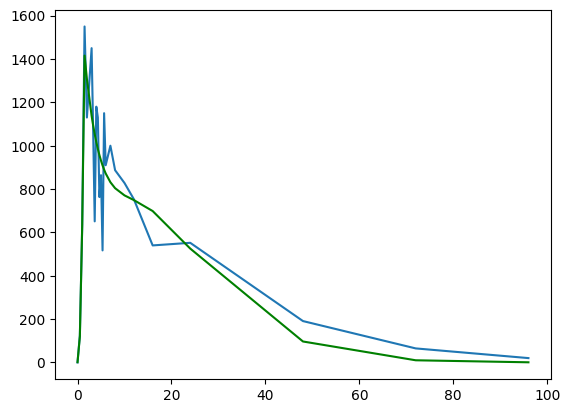

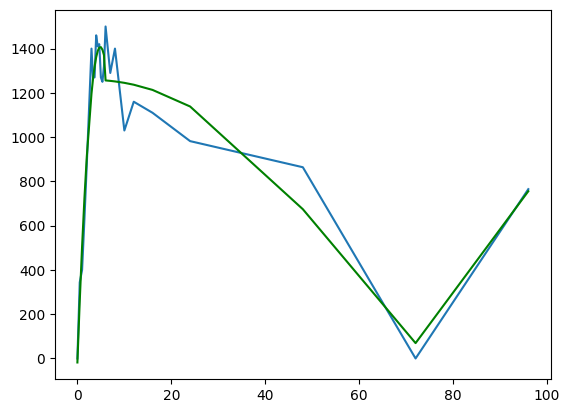

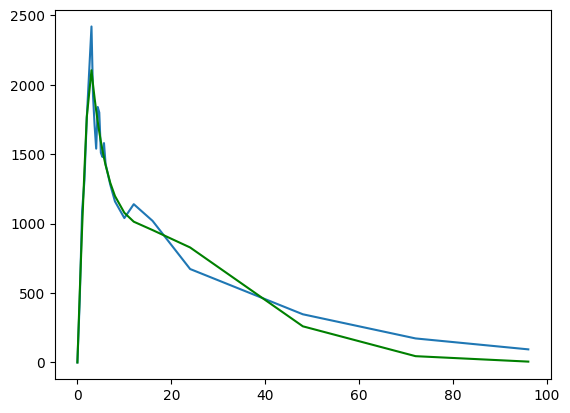

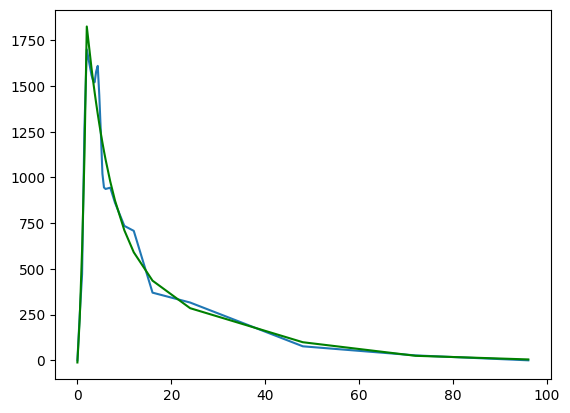

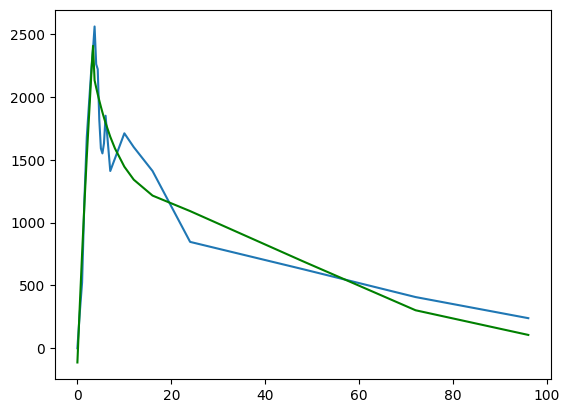

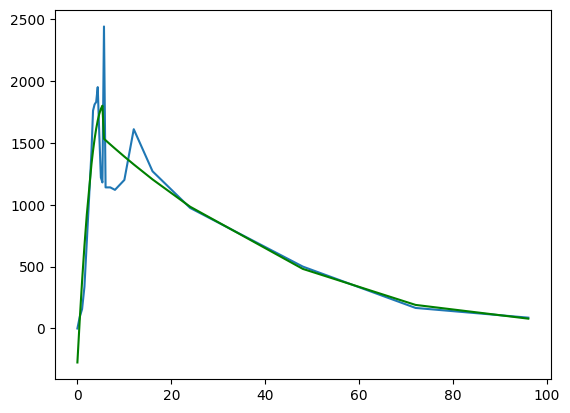

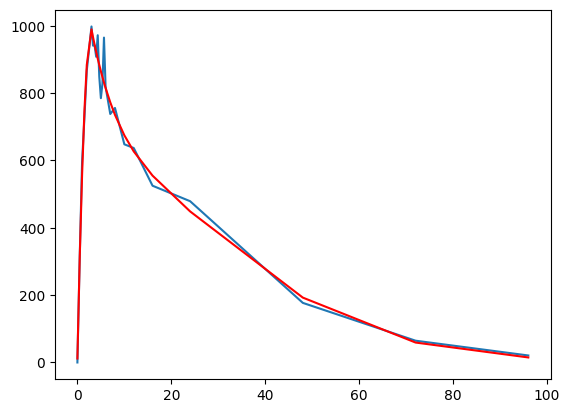

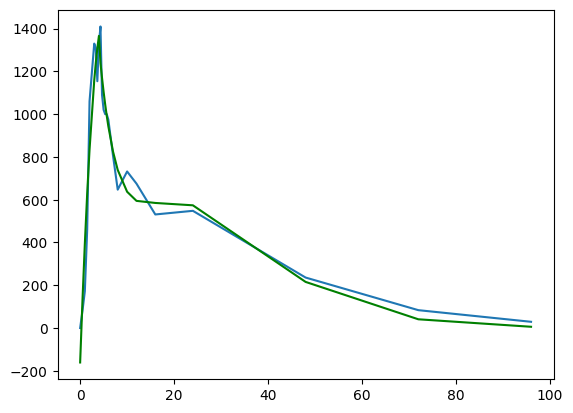

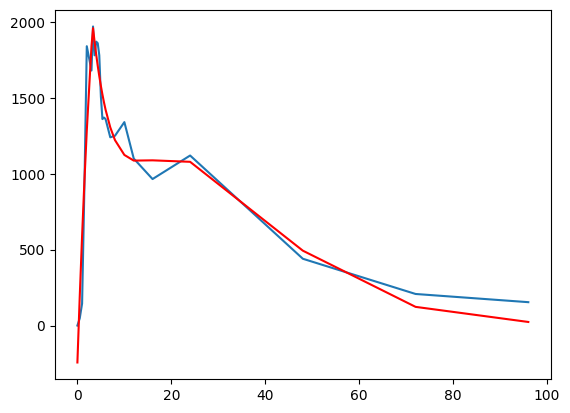

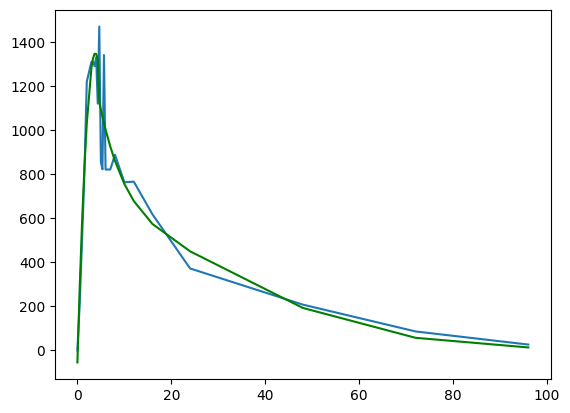

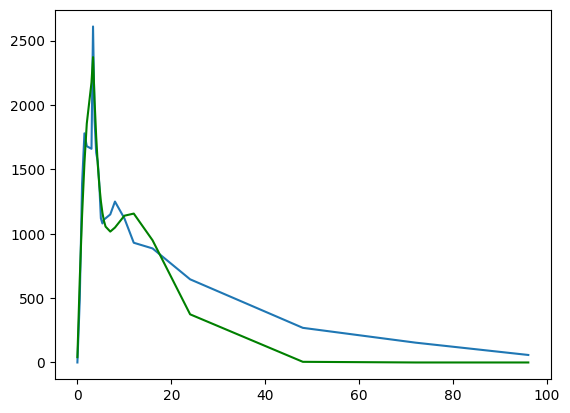

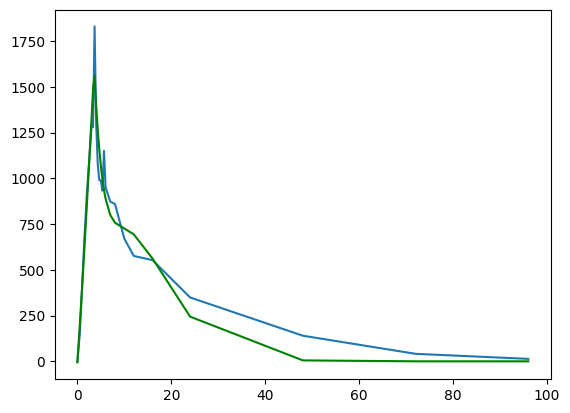

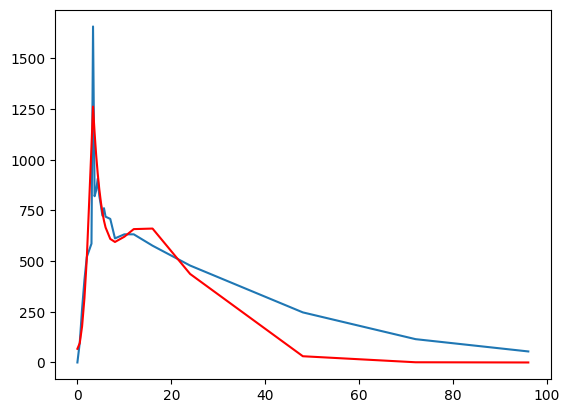

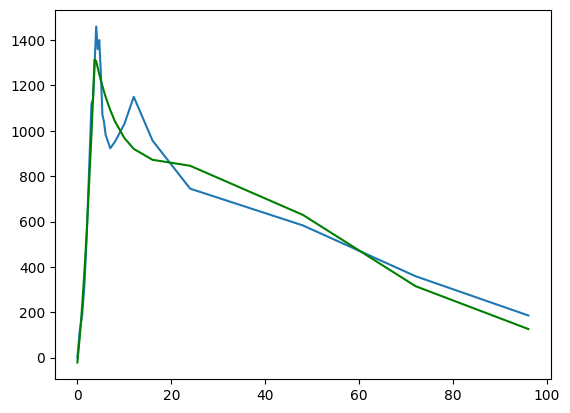

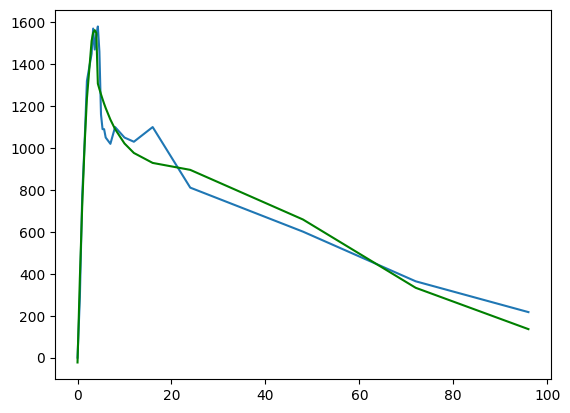

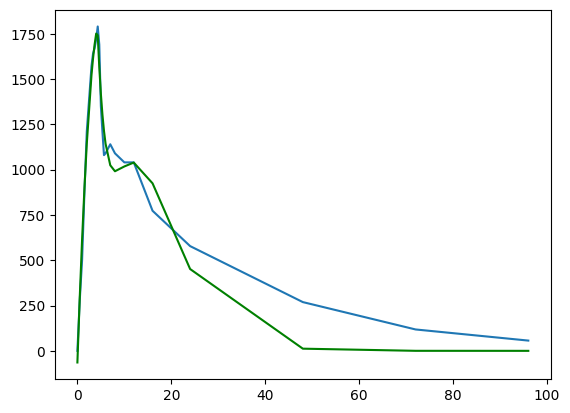

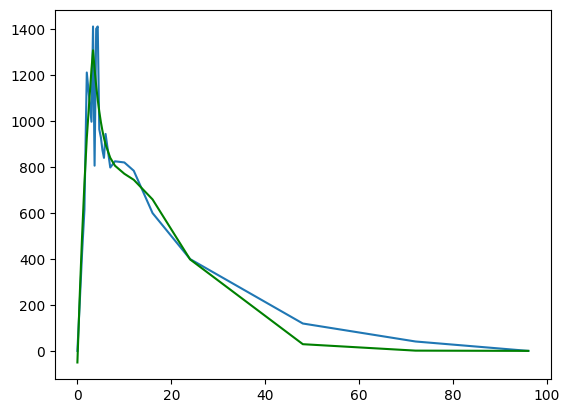

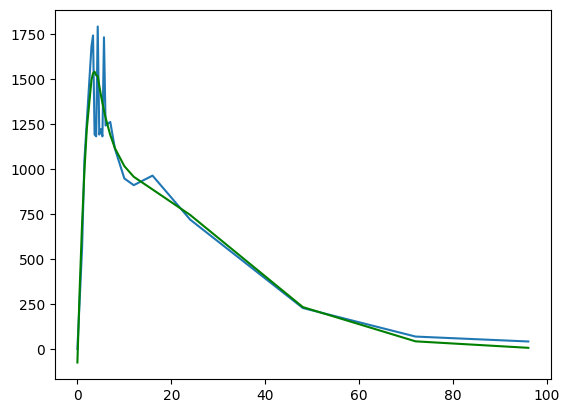

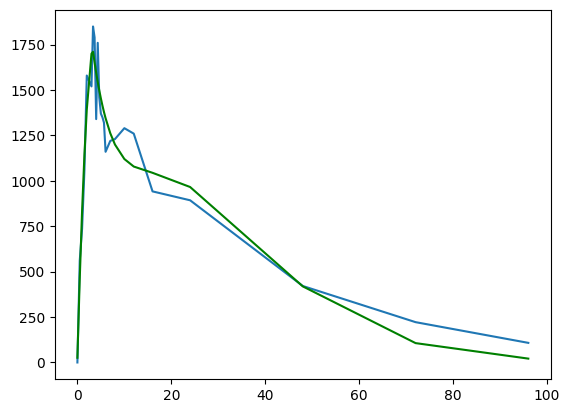

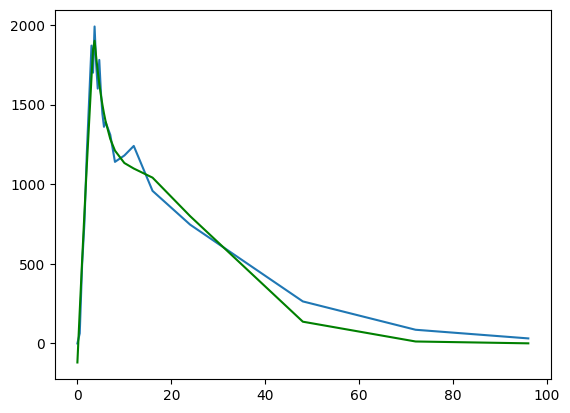

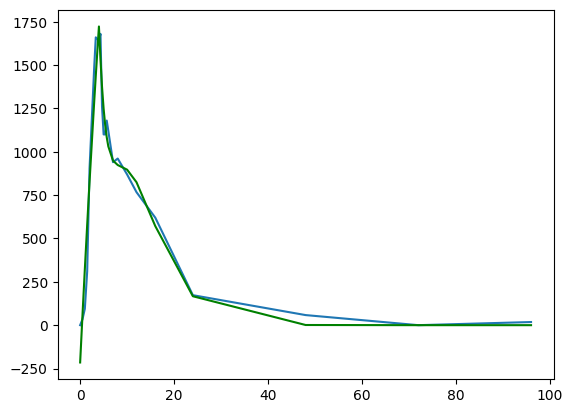

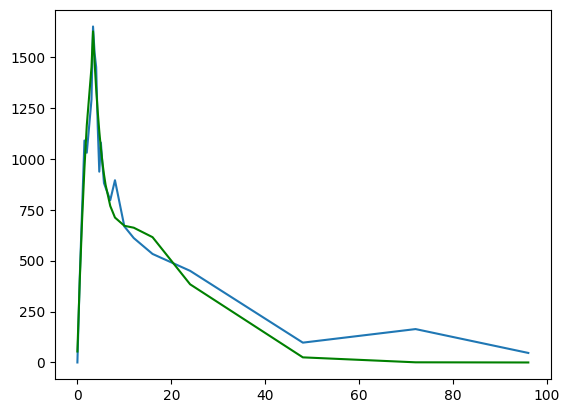

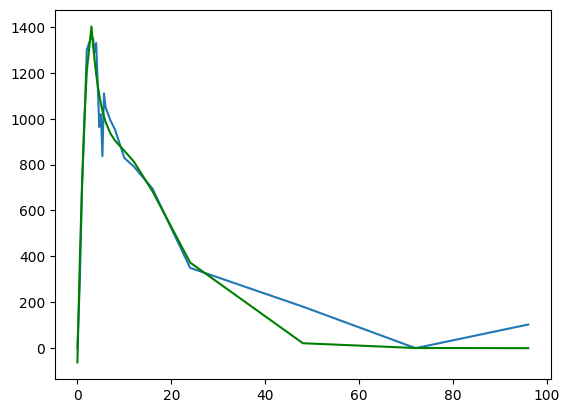

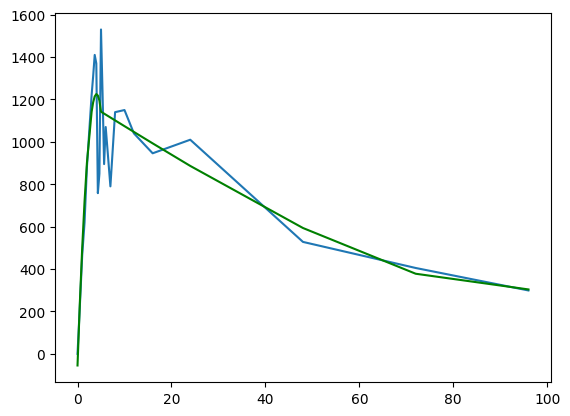

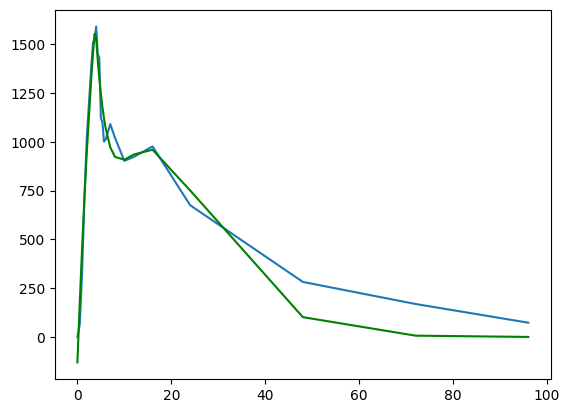

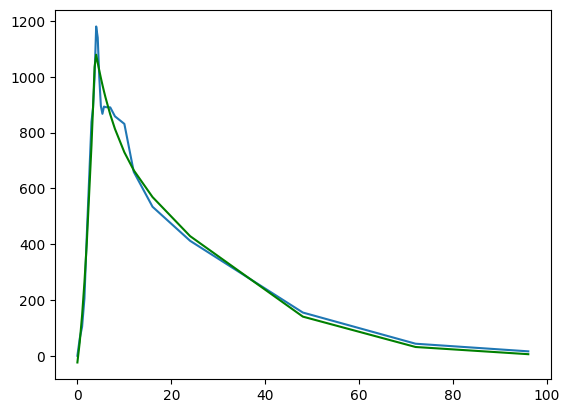

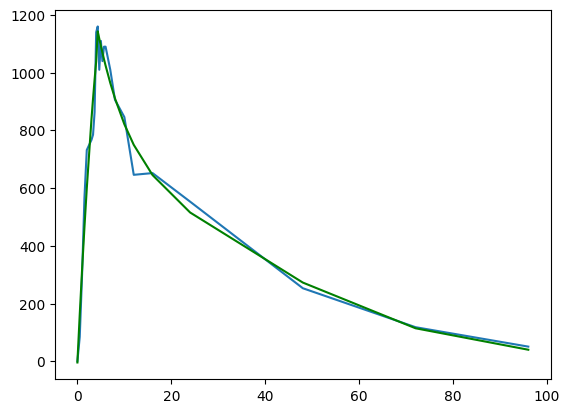

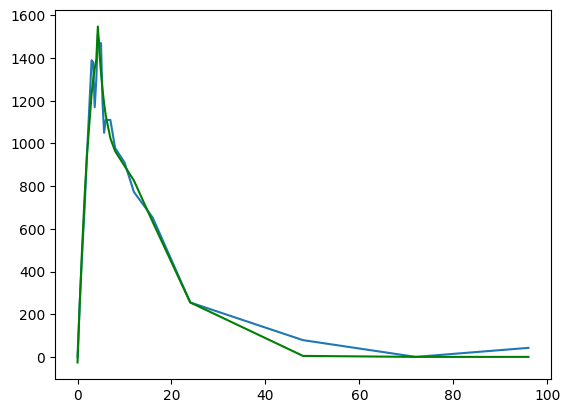

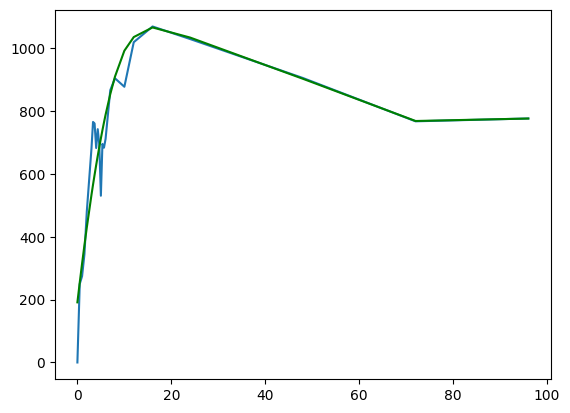

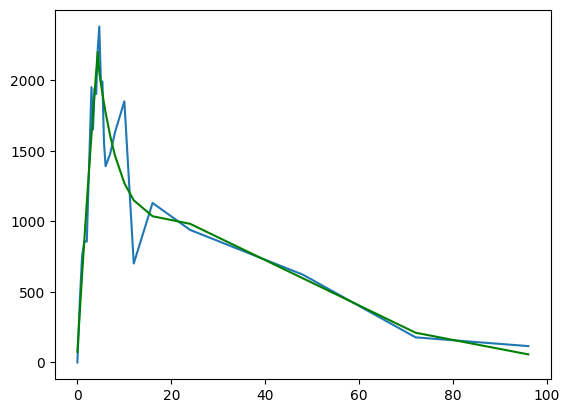

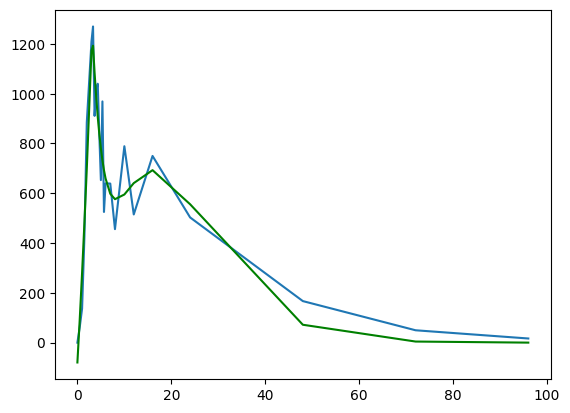

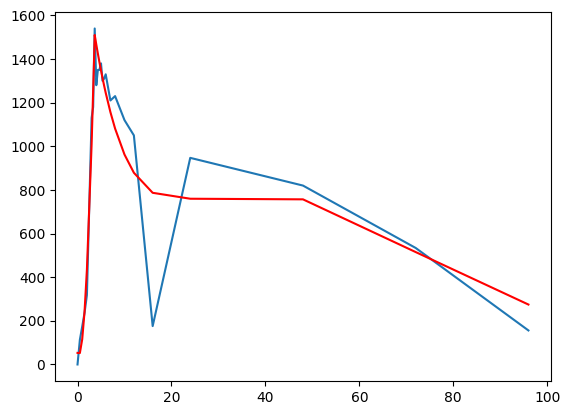

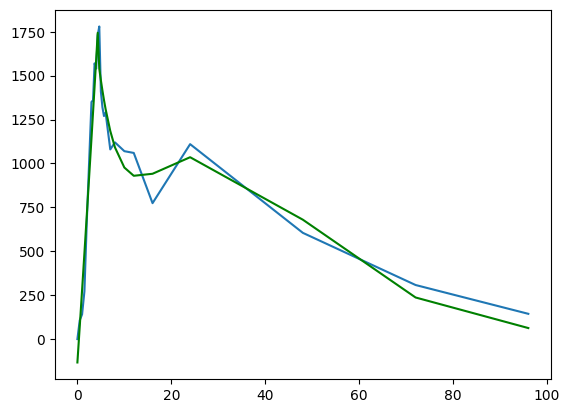

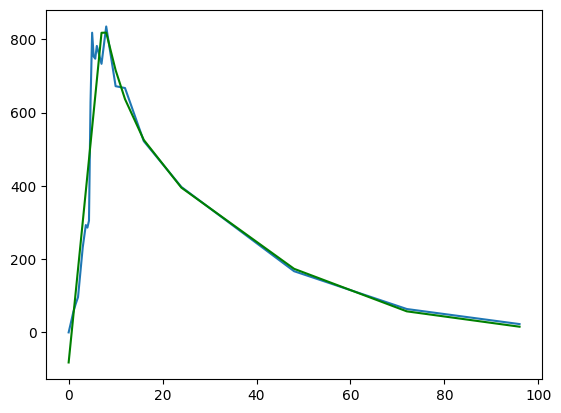

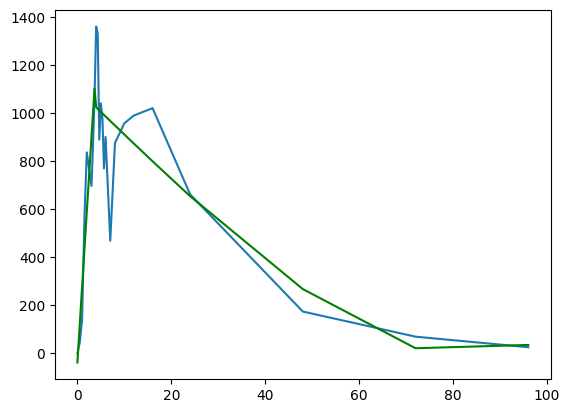

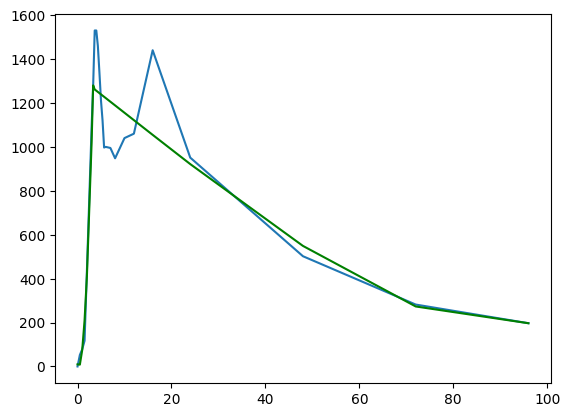

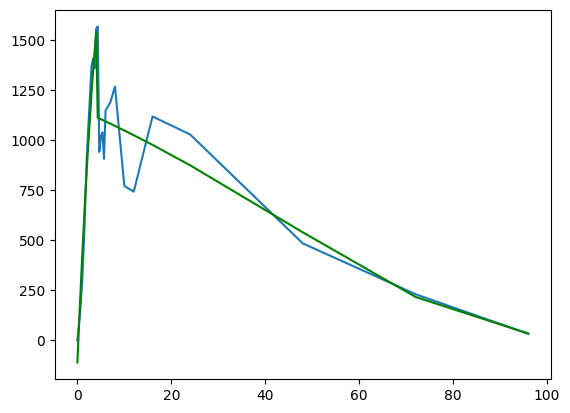

In [19]:
for i in range(len(df)):
    x = np.array([float(elem) for elem in df.drop(['area', 'max'], axis=1).columns])
    y = np.array(df.iloc[i,][:-2])
    try:
        pvalue, popt1, popt2 = check_fit(x, y, f1, f2, alpha, make_plots=True)
        pvalues.append(pvalue)
        a1_, b1_, c1_ = popt1
        a1.append(a1_)
        b1.append(b1_)
        c1.append(c1_)
        a2_, b2_, c2_, d2_ = popt2
        a2.append(a2_)
        b2.append(b2_)
        c2.append(c2_)
        d2.append(d2_)
    except RuntimeError:
        pass
a1 = np.array(a1)
b1 = np.array(b2)
c1 = np.array(c1)
a2 = np.array(a2)
b2 = np.array(b2)
c2 = np.array(c2)
d2 = np.array(d2)

In [20]:
pvalues = np.array(pvalues)

In [21]:
success = pvalues > alpha

In [22]:
success.sum() / len(success)

0.8571428571428571

In [23]:
def plot_with_sort(x, y):
    pairs = sorted(zip(x, y), key=lambda elem: elem[0])
    x = [elem[0] for elem in pairs]
    y = [elem[1] for elem in pairs]
    plt.plot(x, y)

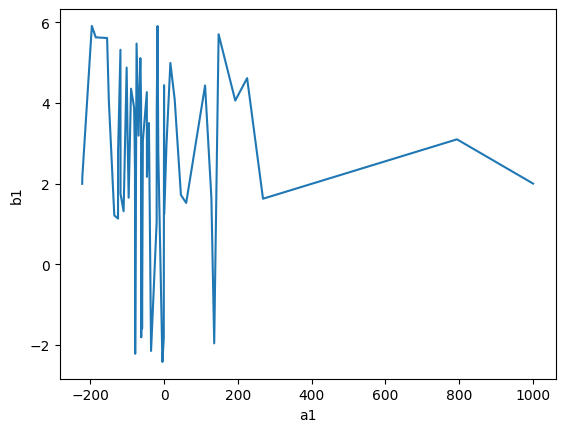

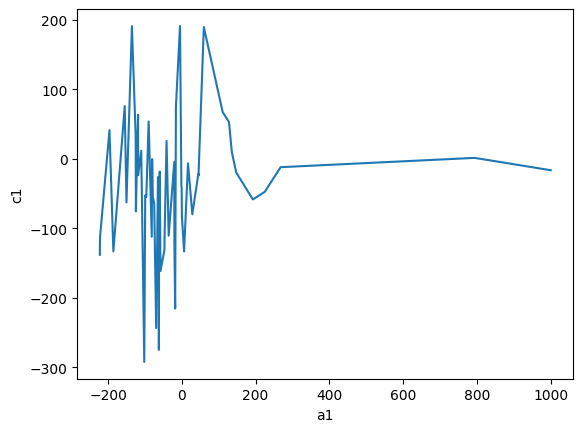

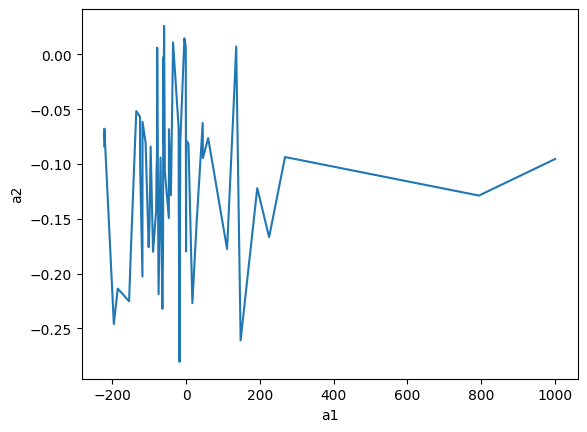

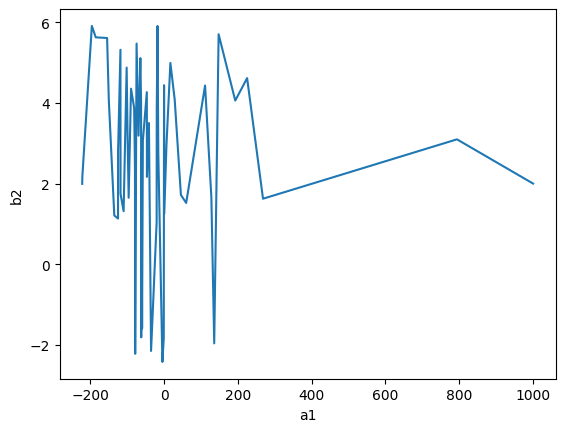

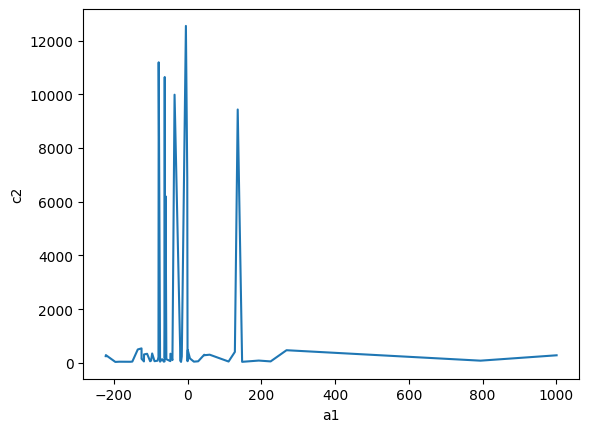

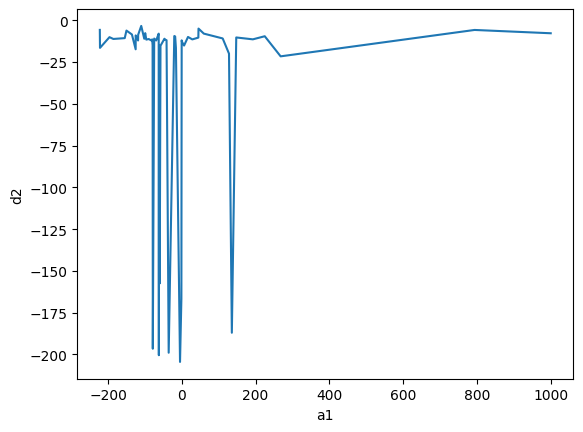

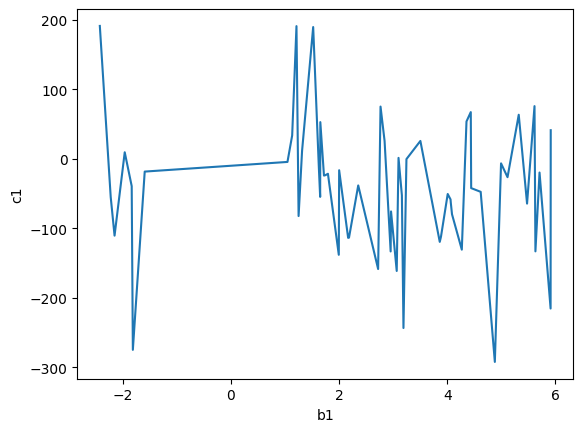

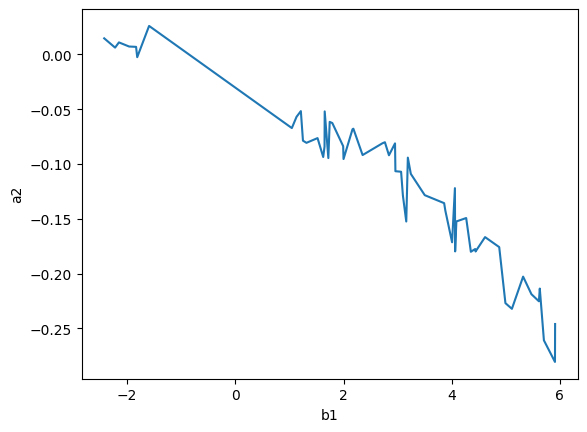

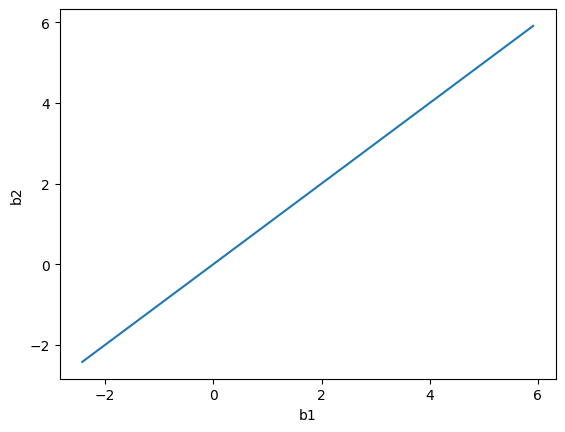

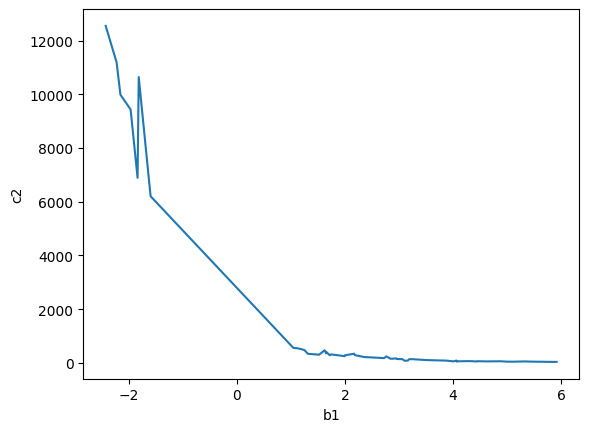

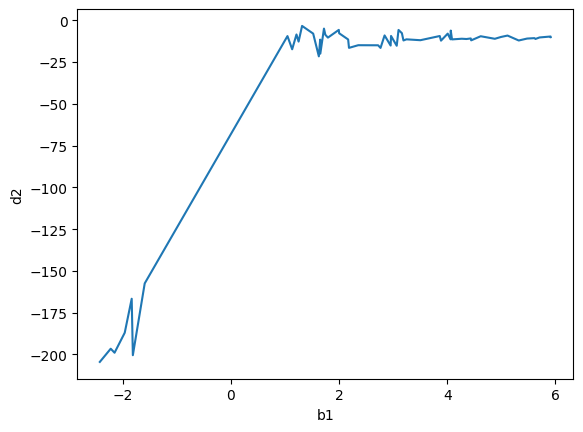

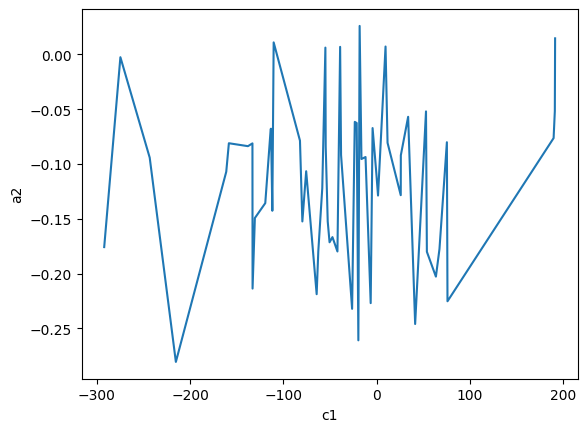

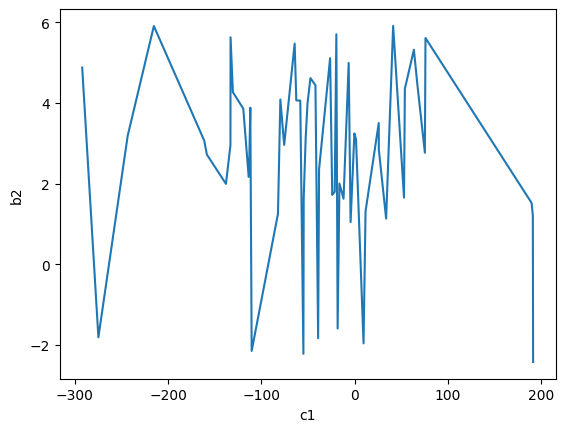

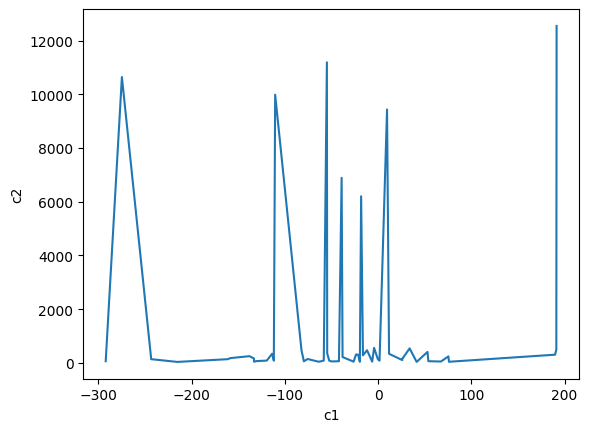

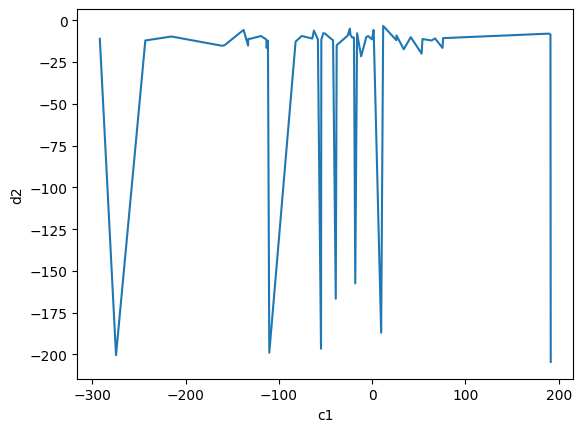

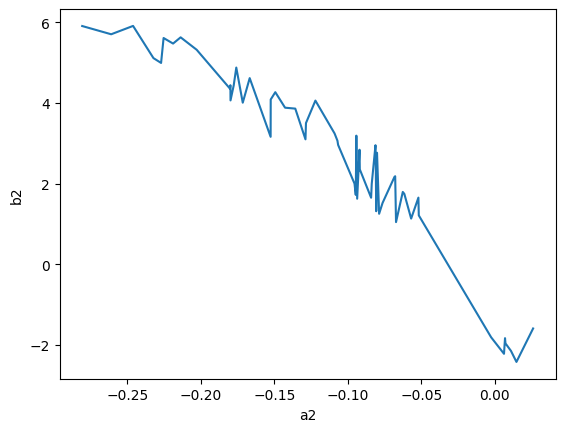

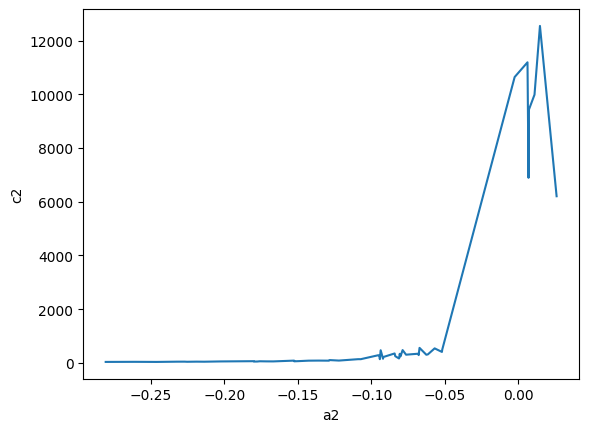

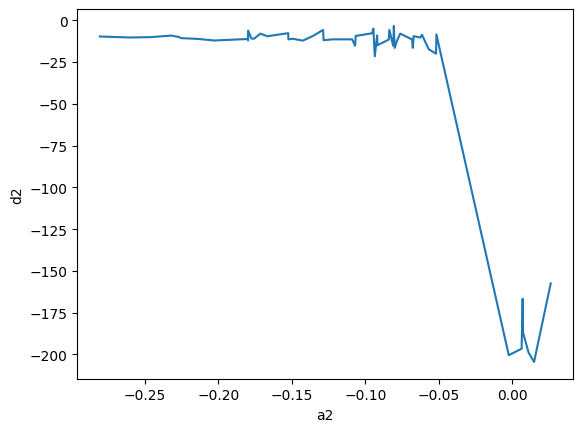

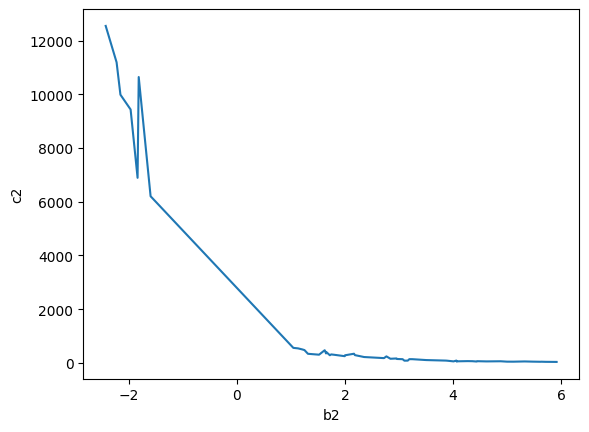

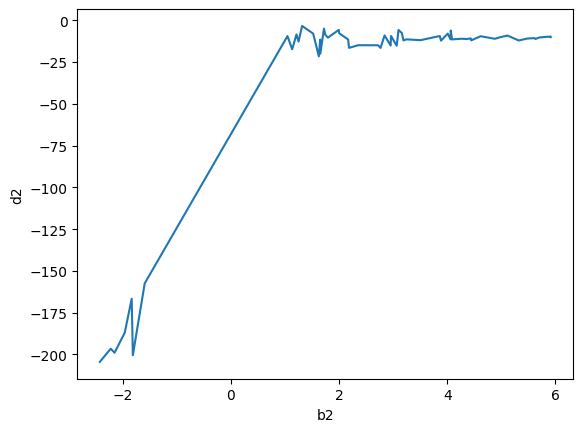

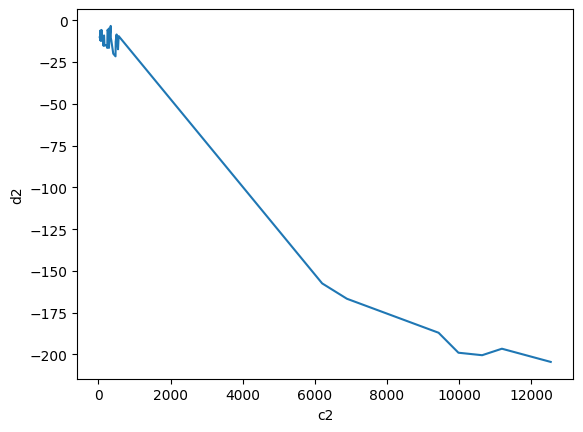

In [24]:
coords = {'a1': a1, 'b1': b1, 'c1': c1, 'a2': a2, 'b2': b2, 'c2': c2, 'd2': d2}
for i in range(len(coords)):
    for j in range(i+1, len(coords)):
        x = list(coords.keys())[i]
        y = list(coords.keys())[j]
        plt.xlabel(x)
        plt.ylabel(y)
        plot_with_sort(coords[x], coords[y])
        plt.show()

Зависимость кожэффициентов от  *2 от b1

In [26]:
x = b1
y1 = a2
y2 = b2
y3 = c2
y4 = d2

In [29]:
points = zip(x, y1, y2, y3, y4)

In [30]:
points = sorted(points, key=lambda elem: elem[0])

In [31]:
def get_col(table, col_number):
    return np.fromiter(map(lambda elem: elem[col_number] , table), dtype=float)

In [32]:
x = get_col(points, 0)
y1 = get_col(points, 1)
y2 = get_col(points, 2)
y3 = get_col(points, 3)
y4 = get_col(points, 4)

[Text(0.5, 0, 'b1'), Text(0, 0.5, 'd2')]

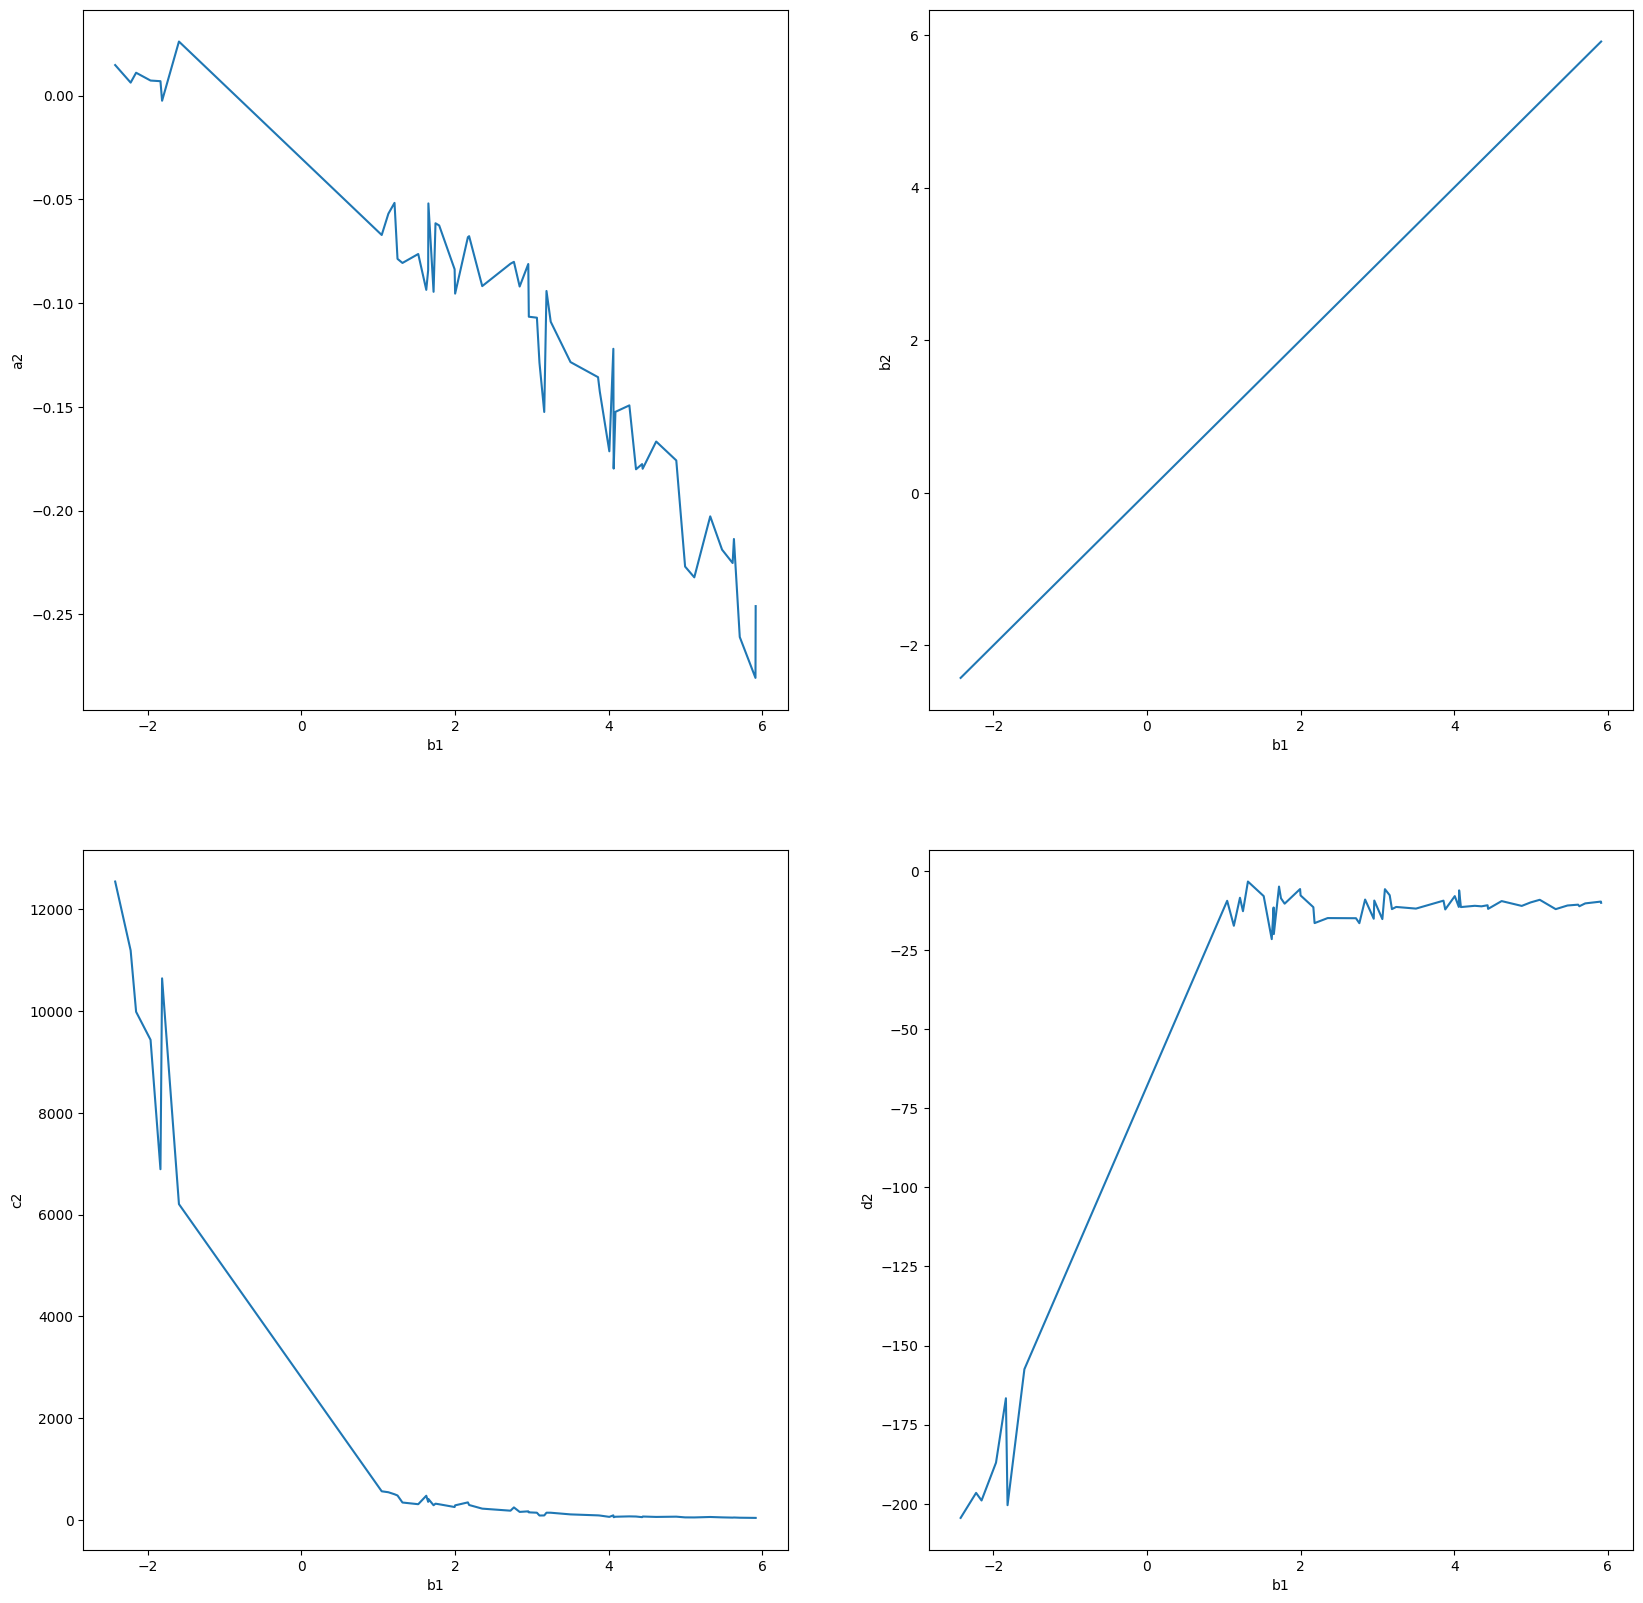

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs[0, 0].plot(x, y1)
axs[0, 0].set(xlabel='b1', ylabel='a2')

axs[0, 1].plot(x, y2)
axs[0, 1].set(xlabel='b1', ylabel='b2')

axs[1, 0].plot(x, y3)
axs[1, 0].set(xlabel='b1', ylabel='c2')

axs[1, 1].plot(x, y4)
axs[1, 1].set(xlabel='b1', ylabel='d2')